In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


SibSp - No of siblings, spouse<br>Parch - No. of parents, children<br> Combine these 2 columns into 1 as Family Size

In [5]:
# Combine SibSp & ParCh into a single column
data['FamilySize'] = data['SibSp'] + data['Parch']
# Drop unnecessary columns
data.drop(columns=['PassengerId','Name','Ticket','SibSp','Parch','Cabin'],inplace=True)

In [6]:
# Check for null values in the data
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [7]:
# Filling null values 
data['Age'] = data['Age'].fillna(round(data['Age'].mean(),0))
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
# Convert sex and embarked into numeric features
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [9]:
# Find the correlation of target column with other columns
corr = {}
columns = list(data.columns)

for i in range(len(columns)):
    corr[columns[i]] = data['Survived'].corr(data[columns[i]])

In [10]:
corr

{'Survived': 1.0,
 'Pclass': -0.33848103596101503,
 'Sex': -0.5433513806577552,
 'Age': -0.07065723128500331,
 'Fare': 0.25730652238496243,
 'Embarked': -0.16767531386772072,
 'FamilySize': 0.01663898928274517}

In [11]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [12]:
# Separate the predictor and target varibales
inputs = data.iloc[:,1:].values
target = data.iloc[:,0].values

In [13]:
# Normalizing the input data
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [14]:
# Split the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.3,random_state=0)

In [15]:
# Building the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [18]:
# Weights associated with the features
predictors = list(data.columns)
target = predictors.pop(0)

weights = {}
absolute_weights = {}

for i in range(len(predictors)):
    weights[predictors[i]] = round(log_reg.coef_[0][i],2)
    absolute_weights[predictors[i]] = abs(round(log_reg.coef_[0][i],2))
    
absolute_weights = dict(sorted(absolute_weights.items(),key=lambda item: item[1],reverse=True))

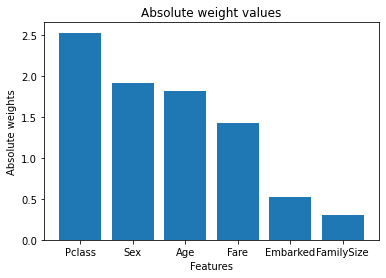

In [19]:
# Identifying the most important features
plt.title("Absolute weight values")
plt.xlabel("Features")
plt.ylabel("Absolute weights")
plt.bar(predictors,absolute_weights.values())
plt.show()

In [21]:
# Applying PCA
pca = PCA()
pca.fit(inputs)

# Computing the explained variance
explained_var = pca.explained_variance_

# Locating the elbow by finding the largest drop in explained variance
var_diff = np.diff(explained_var)
elbow = np.argmin(var_diff)+1

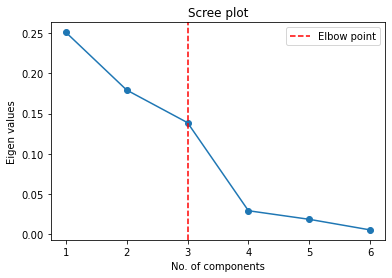

In [22]:
# Scree plot
plt.title('Scree plot')
plt.xlabel('No. of components')
plt.ylabel('Eigen values')
plt.plot(np.arange(1,len(explained_var)+1),explained_var,marker = 'o')
plt.axvline(x = elbow,linestyle = '--', color = 'red',label = 'Elbow point')
plt.legend()
plt.show()

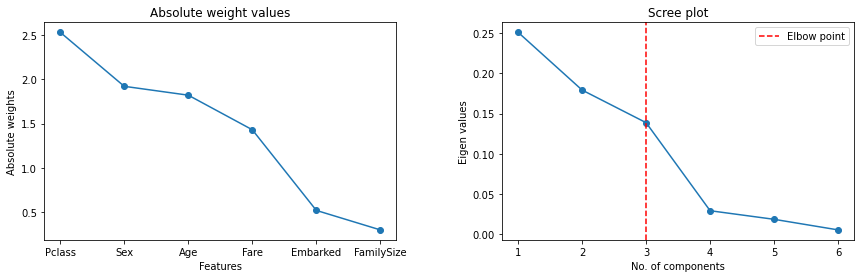

In [23]:
# Analyzing the scree plot & absolute weights plot 
plt.subplot(1,2,1)
plt.title("Absolute weight values")
plt.xlabel("Features")
plt.ylabel("Absolute weights")
plt.plot(predictors,absolute_weights.values(),marker='o')

plt.subplot(1,2,2)
plt.title('Scree plot')
plt.xlabel('No. of components')
plt.ylabel('Eigen values')
plt.plot(np.arange(1,len(explained_var)+1),explained_var,marker = 'o')
plt.axvline(x = elbow,linestyle = '--', color = 'red',label = 'Elbow point')
plt.legend()

plt.subplots_adjust(right=2.0,wspace=0.3)
plt.show()

In [24]:
# Initialize shap explainer
shap.initjs()
explainer = shap.LinearExplainer(log_reg,x_train)

# Calculate shap values for the test data
shap_values = explainer.shap_values(x_test)

### How to interpret the SHAP summary plot?<br>
<b>Positive SHAP values</b> - contribute to increasing prediction probability of <b>positive class</b> (i.e. survival)<br>
<b>Negative SHAP values</b> - contribute to increasing the predicition probability of <b>negative class</b> (i.e. non-survival)<br><br>
Each dot represents a SHAP value for a specific record in the dataset. The position of the dot shows how much the feature influenced the prediction for that record


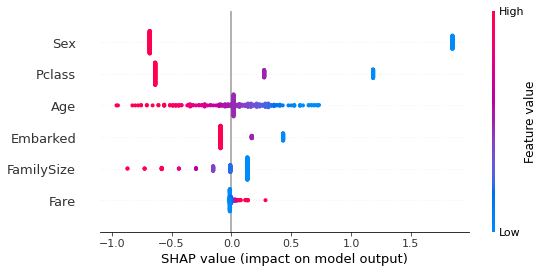

In [25]:
# Global feature importance (summary plot)
shap.summary_plot(shap_values, x_test, feature_names = predictors)

### Inference from the SHAP summary plot<br>
<b>Sex</b> - Blue dots representing women (class 0), have large positive shap value. This indicates that females had a larger likelihood for survival. Red dots representing men(class 1), have large negative values, indicating that men were less likely to survive<br><br>
<b>Pclass</b> - Blue dots representing passenger class 1 (upper class), have high positive shap values, indicating high chance of survival. Red dots representing passenger class 3(lower class), have high negative shap values,indicating less chance of survival<br><br>
<b>Age</b> - Has a neutral impact on survival(mix of colors near 0). But, red dots (indicating old people), has a negative shap value.(i.e.) Elderly people are less likely to survive.<br><br>
<b>Family Size</b> - Larger the family (red dots), lesser the chance of survival (negative shap values)

### How to interpret the SHAP force plot?<br>
The decimal values are the log-odds. The <b>base value</b> indicates the average model output. <br>
<b>f(x)</b> represents the model output for the specific record. This output is passed to the <b>logistic function</b> to get probabilistic value for survival<br>
A negative value(log-odds) suggests that the model is leaning towards a negative prediction(i.e. survival = 0)<br>
<b>Red Arrows</b> indicate that the features are trying to push the model towards positive prediction (i.e. survival) <br>
<b>Blue Arrows</b> indicate that the features are trying to push the model towards negative prediction (i.e. non survival)

In [26]:
# Local feature importance for a single prediction (force plot)
shap.force_plot(explainer.expected_value, shap_values[0, :], data[predictors].iloc[0, :], feature_names= predictors)

### Inference from the SHAP force plot<br>
Here, the model output, <b>f(x) = -1.58</b> i.e. it is pushing the model towards a <b>negative</b> prediction<br>
<b>Family Size = 1 (i.e. no family members)</b> pushes the model towards positive prediction<br>
<b>Sex = 1(Male)</b> and <b>Pclass = 3(lower class)</b> pushes the model towards negative prediction 

In [27]:
# Local feature importance for a single prediction (force plot)
shap.force_plot(explainer.expected_value, shap_values[3, :], data[predictors].iloc[3, :], feature_names= predictors)

### Inference from the SHAP force plot<br>
Here, the model output, <b>f(x) = 2.71</b> i.e. it is pushing the model towards a <b>positive</b> prediction<br>
<b>Sex = 0(Female)</b> and <b>Pclass = 1(upper class)</b> pushes the model towards positive prediction 

#### Visualizing the model prediction

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [73]:
def visualize(inputs):
    '''Takes the log-odds values as a list input'''
    
    # For labels
    red_flag = 0
    green_flag = 0
    
    # Generate data points for the x-axis (e.g., from -10 to 10)
    x = np.linspace(-10, 10, 100)
    # Apply the sigmoid function to the x values
    y = sigmoid(x)

    # Plot the sigmoid curve
    plt.plot(x, y)
    
    # Plot the points on the sigmoid curve
    for i in inputs:
        if sigmoid(i) < 0.5:
            plt.plot(i,sigmoid(i),marker = 'o',color='red',label = 'Negative class' if red_flag == 0 else "")
            red_flag = 1
        else:
            plt.plot(i,sigmoid(i),marker = 'o',color='green',label = 'Positive class' if green_flag == 0 else "")
            green_flag = 1
            
    # Mark the decision boundary(threshold) on the sigmoid curve
    plt.axhline(y = 0.5, linestyle ='--',color = 'orange',label = 'Decision Boundary')

    # Add labels and title
    plt.xlabel('Log-Odds value(x)')
    plt.ylabel('Prob value(sigmoid(x))')
    plt.title('Model prediction probabilites')
    plt.grid(True)
    plt.legend()
    plt.show()

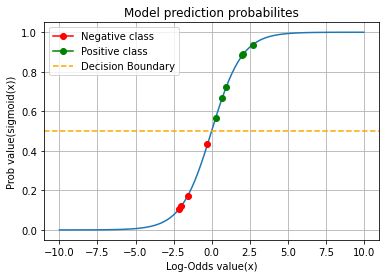

In [74]:
# Visualizing the prediction for first 10 test records
log_odds = []

for i in range(10):
    # Log-Odds = sum of base value + sum of shap values of that record
    log_odds.append(round(np.sum(shap_values[i])+explainer.expected_value,2))
    
visualize(log_odds)